# Homework 8

## Dataset description

Dataset entintled 'mushrooms.csv' contains informations about mushrooms and their properties.
Data comes from the site: https://www.kaggle.com/uciml/mushroom-classification

### Data Loading

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os
import pandas as pd 

df1 = pd.read_csv('mushrooms.csv', delimiter=',')

### Overview

In [2]:
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [6]:
nRow, nCol = df1.shape
print(f'Number of rows: {nRow}')
print(f'Number of columns: {nCol}')

Number of rows: 8124
Number of columns: 23


In [4]:
df1.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [3]:
df1.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Summary Barplots

In [20]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')

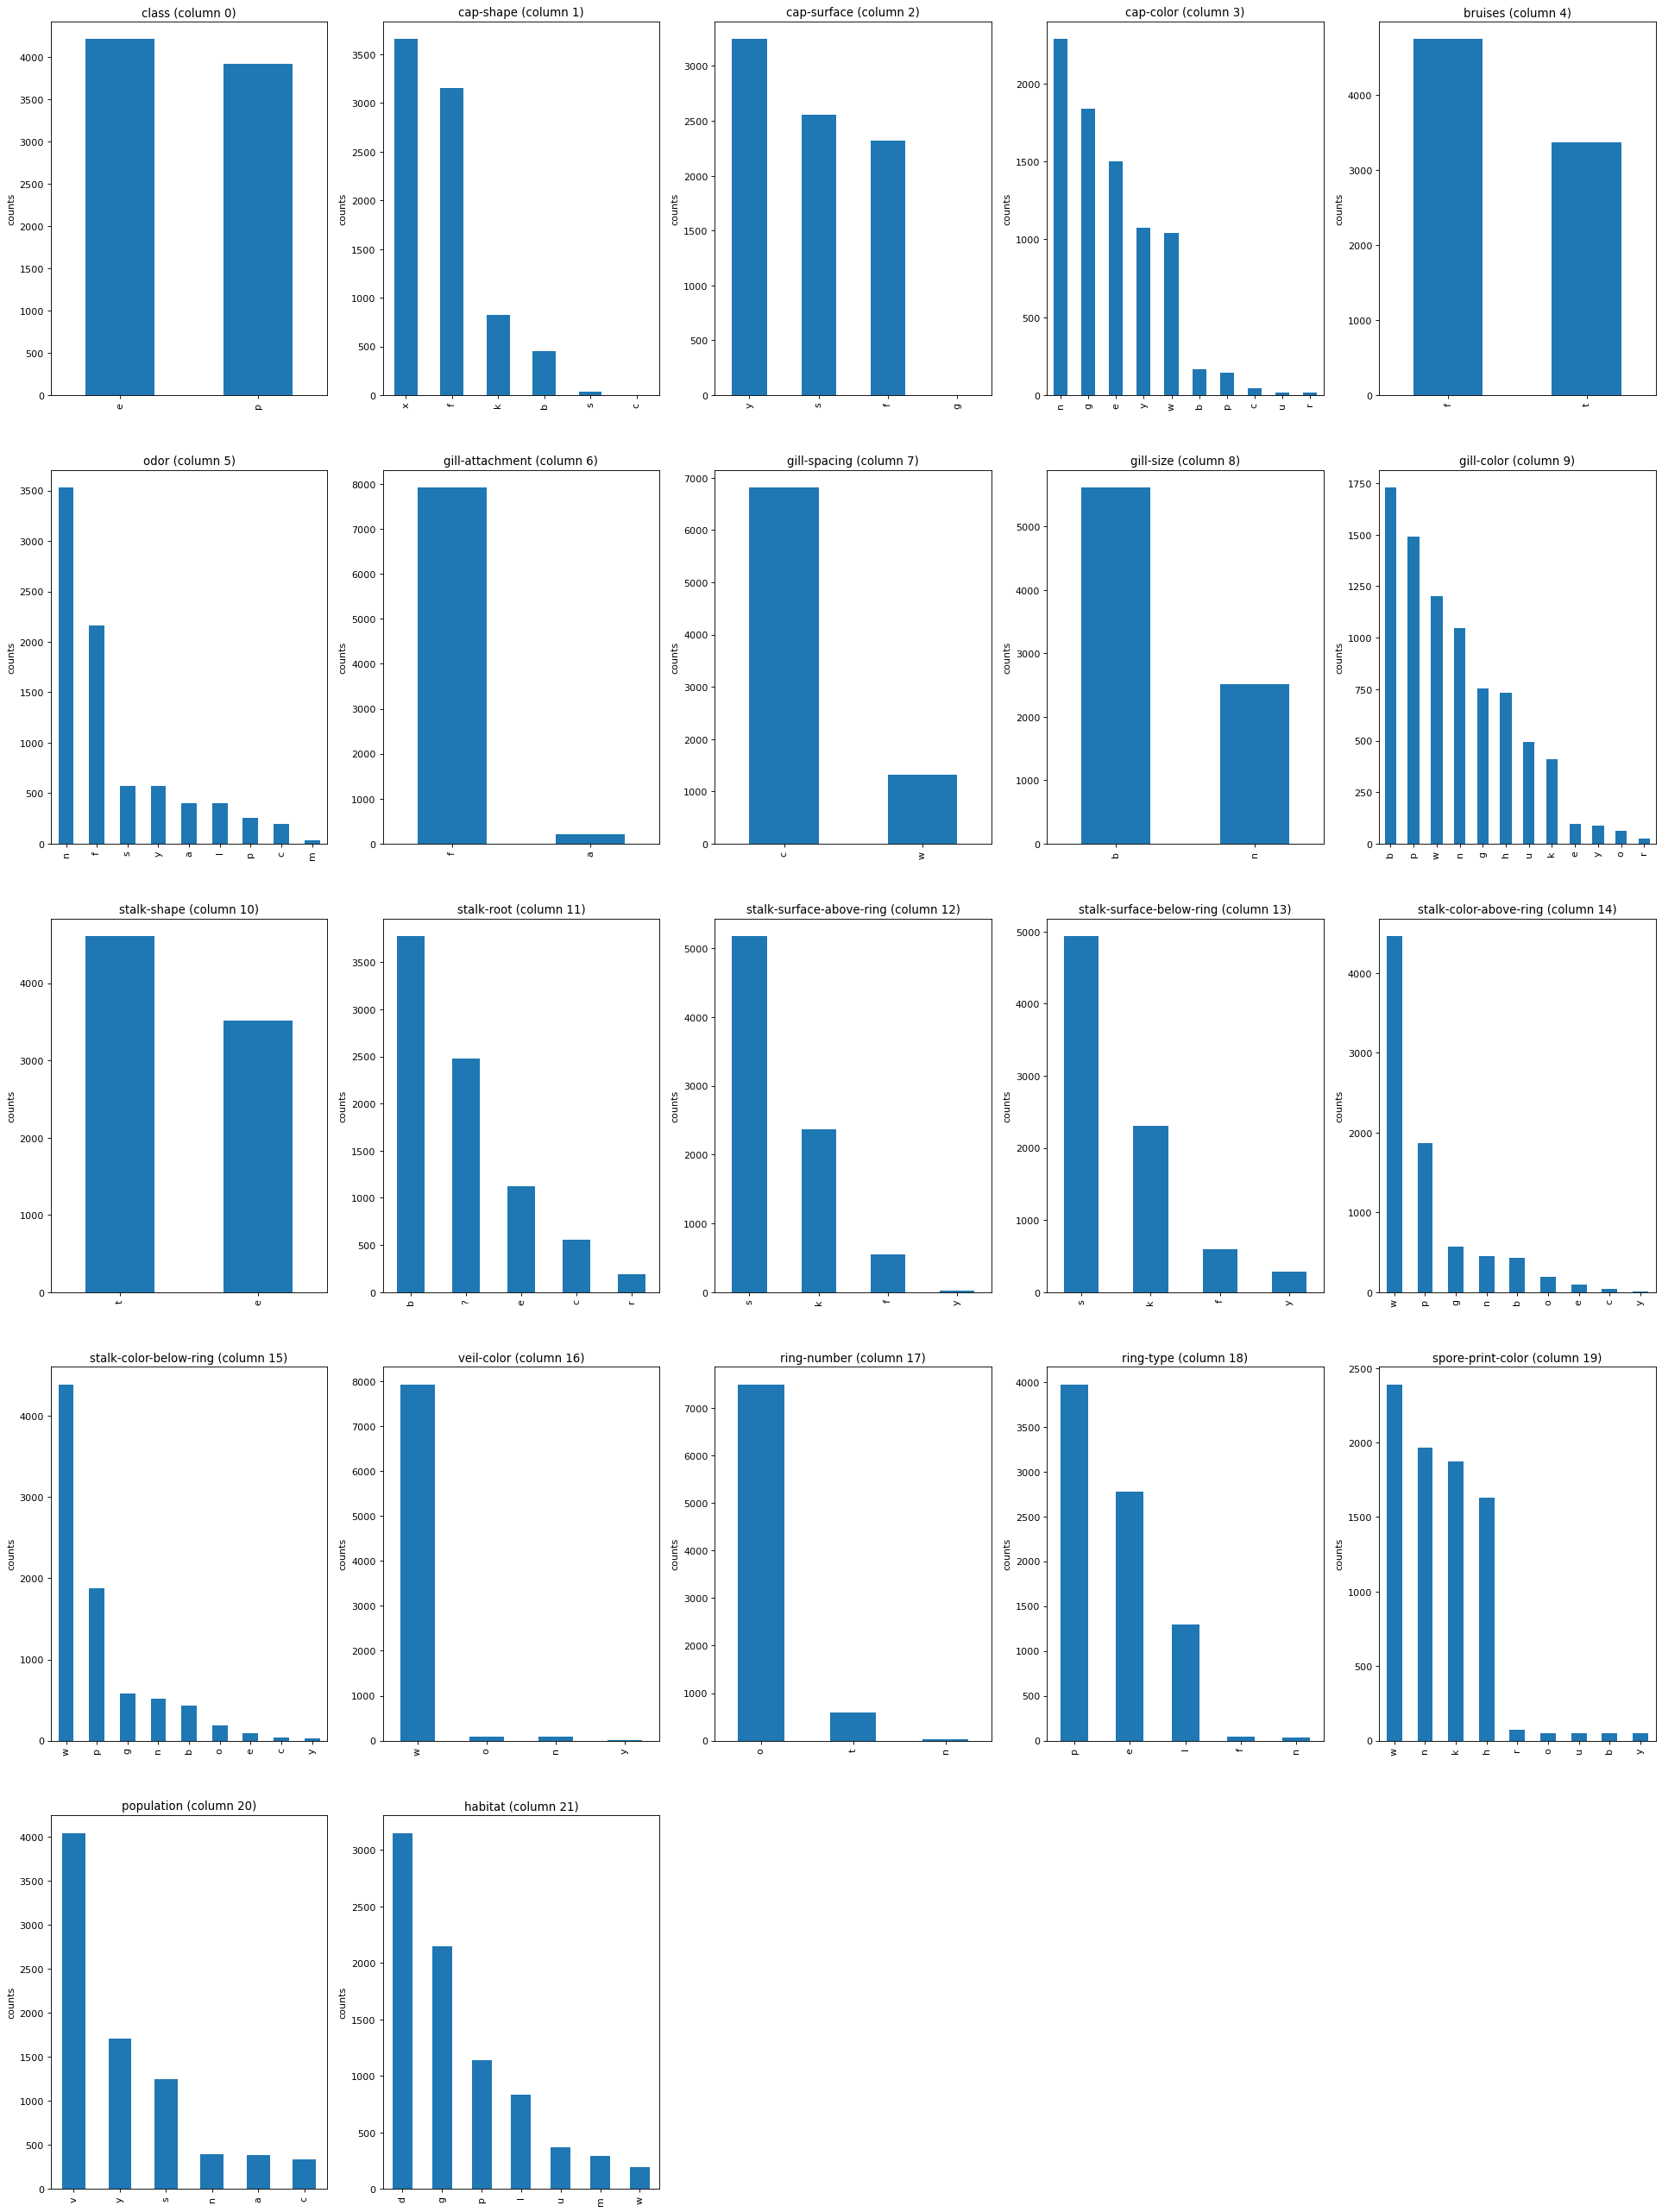

In [22]:
plotPerColumnDistribution(df1,23,5)

### The Most Unusual Mushrooms

In [166]:
def colsToNums(df1,colname):
    df2 = df1.groupby(colname).agg("count")
    df2 = df2.iloc[:,0:1]
    name = colname + "2"
    df2[name]=df2.iloc[:,0]/sum(df2.iloc[:,0])
    df2['index1'] = df2.index
    df2=df2.drop(df2.columns[0],axis=1)
    
    df1 = df1.merge(df2,on=colname)
    #df1.drop("index1",axis=1)
    df1.drop(colname,axis=1)
    return df1

In [170]:
cols = df1.columns
df1
for col in cols:
    df1 = colsToNums(df1,col)
df1 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,ring-number2,index1_x,ring-type2,index1_y,spore-print-color2,index1_x,population2,index1_y,habitat2,index1
0,p,x,s,n,t,p,f,c,n,k,...,0.921713,o,0.488429,p,0.230428,k,0.153619,s,0.045298,u
1,p,f,s,n,t,p,f,c,n,k,...,0.921713,o,0.488429,p,0.230428,k,0.153619,s,0.045298,u
2,p,x,y,n,t,p,f,c,n,k,...,0.921713,o,0.488429,p,0.230428,k,0.153619,s,0.045298,u
3,p,f,y,n,t,p,f,c,n,k,...,0.921713,o,0.488429,p,0.230428,k,0.153619,s,0.045298,u
4,p,x,s,w,t,p,f,c,n,k,...,0.921713,o,0.488429,p,0.230428,k,0.153619,s,0.045298,u
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,f,s,e,t,n,f,c,b,e,...,0.073855,t,0.341704,e,0.293944,w,0.041851,c,0.023634,w
8120,e,k,s,e,t,n,f,c,b,e,...,0.073855,t,0.341704,e,0.293944,w,0.041851,c,0.023634,w
8121,e,x,y,e,t,n,f,c,b,e,...,0.073855,t,0.341704,e,0.293944,w,0.041851,c,0.023634,w
8122,e,f,y,e,t,n,f,c,b,e,...,0.073855,t,0.341704,e,0.293944,w,0.041851,c,0.023634,w


In [172]:
df=df1.select_dtypes(include=np.number)
df

,class2,cap-shape2,cap-surface2,cap-color2,bruises2,odor2,gill-attachment2,gill-spacing2,gill-size2,gill-color2,...,stalk-surface-below-ring2,stalk-color-above-ring2,stalk-color-below-ring2,veil-type2,veil-color2,ring-number2,ring-type2,spore-print-color2,population2,habitat2
0,0.482029,0.450025,0.314623,0.281142,0.415559,0.031512,0.974151,0.838503,0.309207,0.050222,...,0.607582,0.549483,0.539636,1.0,0.975382,0.921713,0.488429,0.230428,0.153619,0.045298
1,0.482029,0.387986,0.314623,0.281142,0.415559,0.031512,0.974151,0.838503,0.309207,0.050222,...,0.607582,0.549483,0.539636,1.0,0.975382,0.921713,0.488429,0.230428,0.153619,0.045298
2,0.482029,0.450025,0.399311,0.281142,0.415559,0.031512,0.974151,0.838503,0.309207,0.050222,...,0.607582,0.549483,0.539636,1.0,0.975382,0.921713,0.488429,0.230428,0.153619,0.045298
3,0.482029,0.387986,0.399311,0.281142,0.415559,0.031512,0.974151,0.838503,0.309207,0.050222,...,0.607582,0.549483,0.539636,1.0,0.975382,0.921713,0.488429,0.230428,0.153619,0.045298
4,0.482029,0.450025,0.314623,0.128016,0.415559,0.031512,0.974151,0.838503,0.309207,0.050222,...,0.607582,0.549483,0.539636,1.0,0.975382,0.921713,0.488429,0.230428,0.153619,0.045298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.517971,0.387986,0.314623,0.184638,0.415559,0.434269,0.974151,0.838503,0.690793,0.011817,...,0.607582,0.011817,0.011817,1.0,0.975382,0.073855,0.341704,0.293944,0.041851,0.023634
8120,0.517971,0.101920,0.314623,0.184638,0.415559,0.434269,0.974151,0.838503,0.690793,0.011817,...,0.607582,0.011817,0.011817,1.0,0.975382,0.073855,0.341704,0.293944,0.041851,0.023634
8121,0.517971,0.450025,0.399311,0.184638,0.415559,0.434269,0.974151,0.838503,0.690793,0.011817,...,0.607582,0.011817,0.011817,1.0,0.975382,0.073855,0.341704,0.293944,0.041851,0.023634
8122,0.517971,0.387986,0.399311,0.184638,0.415559,0.434269,0.974151,0.838503,0.690793,0.011817,...,0.607582,0.011817,0.011817,1.0,0.975382,0.073855,0.341704,0.293944,0.041851,0.023634


In [177]:
df.mean(axis=1).sort_values().head(5)

5955    0.290776
7859    0.292766
7857    0.295164
5937    0.296748
7858    0.297176
dtype: float64

In [181]:
df.mean(axis=1).sort_values().tail(5)

3480    0.565613
2976    0.565924
3504    0.566438
2964    0.567476
3476    0.567990
dtype: float64

 * Indices of the most unusual mushrooms: 5955, 7859, 7857, 5937, 7858 
 * Indices of the most typical mushrooms: 3476, 2964, 3504, 2976, 3480

In [184]:
df3.iloc[5955,:]==df3.iloc[3476,:]

class                       False
cap-shape                   False
cap-surface                  True
cap-color                   False
bruises                     False
odor                         True
gill-attachment              True
gill-spacing                 True
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                    True
veil-color                   True
ring-number                  True
ring-type                   False
spore-print-color           False
population                  False
habitat                      True
dtype: bool

## How different parameters affect poisonousness?

### Cap-shape:

In [5]:
df1.groupby('cap-shape')['class'].value_counts()

cap-shape  class
b          e         404
           p          48
c          p           4
f          e        1596
           p        1556
k          p         600
           e         228
s          e          32
x          e        1948
           p        1708
Name: class, dtype: int64

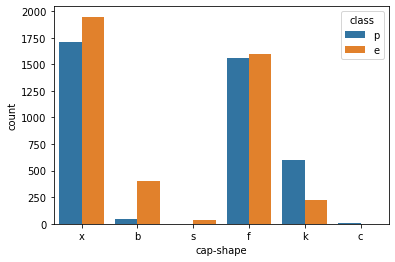

In [3]:
import seaborn as sns
sns.countplot(data=df1,x='cap-shape',hue='class')

#### Conclusions:

* Most mushrooms of cap-shape b (bell), are edible (e)
* All sunken (s) mushrooms are edible, although there is little data on that type of cap-shape

### Cap-color:

In [12]:
df1.groupby('cap-color')['class'].value_counts()

cap-color  class
b          p         120
           e          48
c          e          32
           p          12
e          p         876
           e         624
g          e        1032
           p         808
n          e        1264
           p        1020
p          p          88
           e          56
r          e          16
u          e          16
w          e         720
           p         320
y          p         672
           e         400
Name: class, dtype: int64

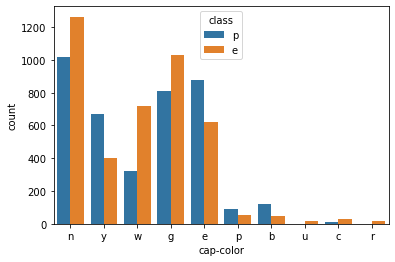

In [13]:
sns.countplot(data=df1,x='cap-color',hue='class')

#### Conclusions

* Most white mushrooms are edible
* All purple and green mushrooms are edible

### Bruises:

In [14]:
df1.groupby('bruises')['class'].value_counts()

bruises  class
f        p        3292
         e        1456
t        e        2752
         p         624
Name: class, dtype: int64

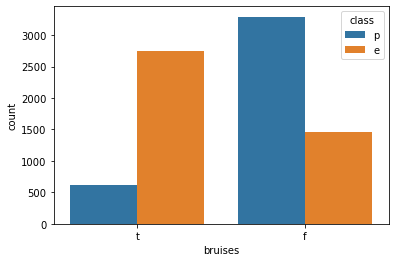

In [15]:
sns.countplot(data=df1,x='bruises',hue='class')

#### Conclusions:

* If a mushroom has bruises, it is probably edible

### Stalk-root

In [16]:
df1.groupby('stalk-root')['class'].value_counts()

stalk-root  class
?           p        1760
            e         720
b           e        1920
            p        1856
c           e         512
            p          44
e           e         864
            p         256
r           e         192
Name: class, dtype: int64

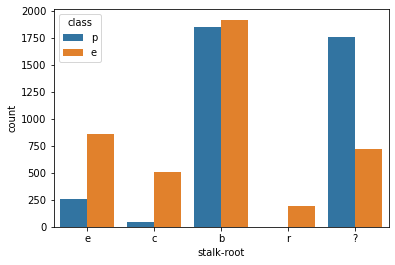

In [17]:
sns.countplot(data=df1,x='stalk-root',hue='class')

#### Conclusions

* Mushrooms with club (c) and equal (e) stalk root are almost surely edible
* All mushrooms with rooted (r) stalk root are edible

## Summary

All the columns of the dataset are non-numeric. Due to that, diversity of the charts has been limited only to barplots and tables. Nevertheless, a few noticeable conclusions has been made from the analysis above. 

1. Vast majority of mushrooms have only one ring (ring-number)
2. Mushrooms usually do not have an attached gill.
3. There are no mushrooms that are unique in every category, even the most unique mushrooms ar ein 29% similar to the others. 
4. There are some columns which have almost equal distribution of mushrooms
5. If the mushroom is white, purple or green, it is probably edible